In [1]:
import os
from PIL import Image
import numpy as npy
from utils import print_model_metrics_ODF, print_model_metrics_OIF
import torch
import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import roc_auc_score, f1_score, PrecisionRecallDisplay, precision_recall_curve

In [2]:
# data_path = r'C:\Users\appel\Documents\Project\simulation-synthesis\output\448\labeled_fake_test'
# result_path = r'C:\Users\appel\Documents\Project\image-synthesis\old\result_real_archviz5500\fuse'

data_path = r'C:\Users\appel\Documents\Project\simulation-synthesis\output\448\labeled_real_test'
result_path = r'C:\Users\appel\Documents\Project\image-synthesis\old\result_real1\fuse'

In [3]:
data_files = os.listdir(data_path)
result_files = os.listdir(result_path)

modality = 'outlines'
gt = [f for f in data_files if modality in f]

In [4]:
ground_truths = torch.Tensor(len(gt),1,448,608)
results = torch.Tensor(len(gt),1,448,608)

In [5]:
for i in range(len(result_files)):
    groundt = np.array(Image.open(os.path.join(data_path, gt[i])))
    if len(groundt.shape) > 2:
        groundt = groundt[:, :, 0]
    ground_truths[i] = torch.Tensor(groundt)/255
    result = Image.open(os.path.join(result_path, result_files[i]))
    results[i] = torch.Tensor(255-np.array(result))/255

In [6]:
# ground_truths = torch.zeros(5,1,20,20)

# ground_truths[:, :, 2:5, 6:12] = 1

# results = torch.zeros(5,1,20,20)
# results[:, :, 2:3, 7:12] = 1
# results[2, :,  2:4, 6:12] = 1

In [7]:
j=0
i=5

In [8]:
auc  = roc_auc_score(ground_truths[j:i].flatten(), results[j:i].flatten())

In [9]:
precision, recall, _ = precision_recall_curve(ground_truths[j:i].flatten(), results[j:i].flatten())

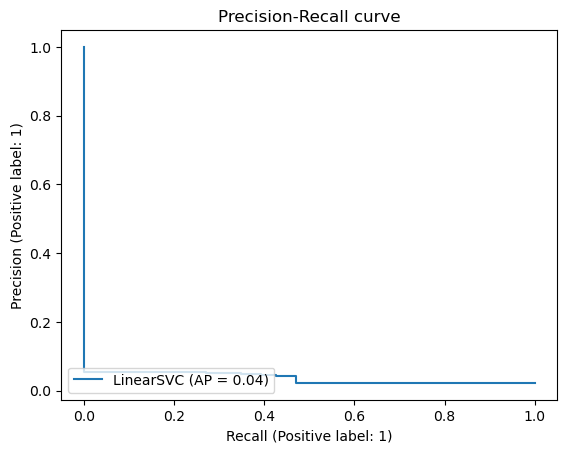

In [10]:
display = PrecisionRecallDisplay.from_predictions(ground_truths[j:i].flatten(), results[j:i].flatten(), name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve")

In [11]:
pred = results[j:i]>.5
targ = ground_truths[j:i]

In [12]:
# tp = pred[targ==1].sum().float()
# fp = pred[targ==0].sum().float()
# fn = targ[pred==0].sum().float()
# tn = (targ[pred==0] == 0).sum().float()

# print(tp, fp, fn, tn)

In [13]:
# sens = (tp/(tp+fn)).cpu().numpy()
# spec = (tn/(tn+fp)).cpu().numpy()
# prec = (tp/(tp+fp)).cpu().numpy()
# acc  = ((tp + tn) / targ.numel()).cpu().numpy()

# print(sens, spec, prec, acc)

In [14]:
# j=0
# i=5
# f1_score(ground_truths[j:i].flatten(), results[j:i].flatten()>.8, pos_label=1, zero_division=0, average='binary')

F1 ODF: 0.089 | Pr: 0.053 | Re: 0.281 | AUC: 0.620 | Accuracy: 0.870 | Best threshold: 0.745             n
F1 OIF: 0.100 | Pr: 0.060 | Re: 0.641 | AUC: 0.634 | Accuracy: 0.513 | Best threshold: 0.352             n


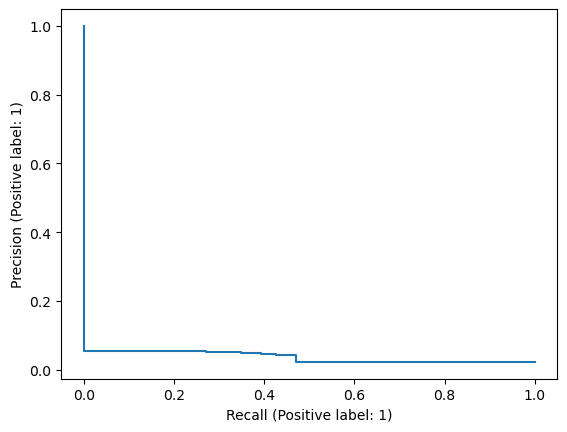

In [16]:
matching_distance = 1

j=0
i=5
m1_ODF = print_model_metrics_ODF(ground_truths[j:i], results[j:i], matching_distance=matching_distance, plot=True)
m1_OIF = print_model_metrics_OIF(ground_truths[j:i], results[j:i], matching_distance=matching_distance)

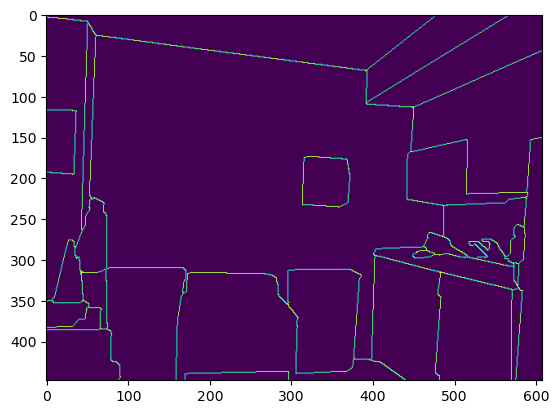

In [43]:
plt.imshow(ground_truths[0][0]/255)

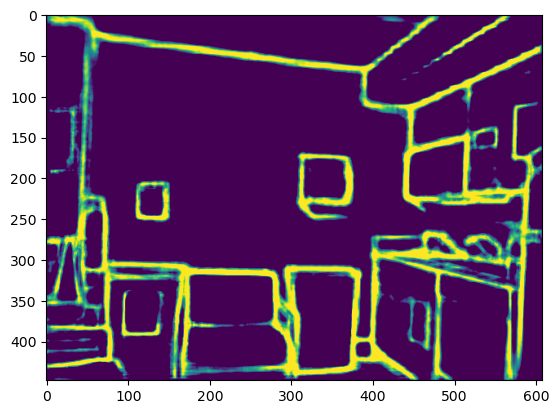

In [44]:
plt.imshow(results[0][0]/255)

In [61]:
ground_truth = ground_truths[0][0]
prediction = results[0][0]>0.1

In [62]:
f1 = f1_score(ground_truth.flatten(), prediction.flatten())
print(f1)

0.1607050609727462


In [63]:
prediction.unique()

tensor([False,  True])